In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr
from sklearn.preprocessing import StandardScaler
import datetime as dt
import yfinance as yf

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

# Bagging -> Bootstrap Aggregation
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

#Step 3 fitting of algorithm
# Boosting -> Gradient Descent is an element of Gradient Boosting Regression - XGB & Random Forest
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Neural Network -> Multi-Level-Perceptron
from sklearn.neural_network import MLPRegressor

#Step 1 Fitting
from sklearn.model_selection import train_test_split
#Cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#Grid-search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Step 4&5
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

#EDA Tool Kits
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
from sklearn.linear_model import LinearRegression

### Setting plotting and display options

In [4]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [5]:
%matplotlib inline

# Data Preprocessing 

## 1. combining trainset and testing set
## 2. encode text data and dealing with nan 

In [6]:
training_set =pd.read_csv("train.csv", index_col=0)
training_set

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
testing_set =pd.read_csv("test.csv", index_col=0)
testing_set

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [8]:
all_data = pd.concat((training_set.loc[:,"MSSubClass":"SalePrice"],testing_set.loc[:,"MSSubClass":"SaleCondition"]))

In [9]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [10]:
#since sales price has about 50% NA, we will only drop columns with more than 50% NA
all_data["SalePrice"].isna().mean()

0.499828708461802

In [11]:
#checking for na columns that has more than 30% NA
check=all_data.isna().mean()> 50
check.any()

False

In [12]:
#checking for na columns that has more than 30% NA
check=all_data.isna().mean()> 0.25
check.any()

True

In [13]:
# Use this to exclude columns with x% missing values. adjust drop parameter as needed
def missing_value(df, drop = 0.3):
    exclude = df.isna().mean().sort_values(ascending=False)
    list(exclude[exclude > drop].index)
    exclude_shortlist = sorted(list(exclude[exclude > drop].index))
    df.drop(exclude_shortlist, axis = 1, inplace = True)
    df = df.ffill()
    return df

In [14]:
missing_value (all_data, drop = 0.5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,147500.0
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,147500.0
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,147500.0


In [15]:
#check again for NA
check1=all_data.isna().mean()>0.5
check1.any()

False

# Encoding for columns

In [16]:
all_data.iloc[:,:-1].fillna(all_data.mean()) #only fills up all numerical data 

C:\Users\final\AppData\Local\Temp\ipykernel_29056\556683909.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_data.iloc[:,:-1].fillna(all_data.mean()) #only fills up all numerical data


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [17]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN


In [18]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
all_data1=all_data.iloc[:,:-1].apply(label_encoder.fit_transform)
all_data1["SalePrice"]=all_data["SalePrice"]
all_data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,5,3,41,619,1,3,3,0,4,0,...,0,0,0,0,0,1,2,8,4,208500.0
2,0,3,56,895,1,3,3,0,2,0,...,0,0,0,0,0,4,1,8,4,181500.0
3,5,3,44,1266,1,0,3,0,4,0,...,0,0,0,0,0,8,2,8,4,223500.0
4,6,3,36,883,1,0,3,0,0,0,...,160,0,0,0,0,1,0,8,0,140000.0
5,5,3,60,1670,1,0,3,0,2,0,...,0,0,0,0,0,11,2,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,13,4,0,23,1,3,3,0,4,0,...,0,0,0,0,0,5,0,8,4,NaN
2916,13,4,0,20,1,3,3,0,4,0,...,0,0,0,0,0,3,0,8,0,NaN
2917,0,3,121,1863,1,3,3,0,4,0,...,0,0,0,0,0,8,0,8,0,NaN


# EDA (Explainatory Data Analysis)

In [19]:
all_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int32  
 2   LotFrontage    2919 non-null   int64  
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int32  
 5   LotShape       2919 non-null   int32  
 6   LandContour    2919 non-null   int32  
 7   Utilities      2919 non-null   int32  
 8   LotConfig      2919 non-null   int32  
 9   LandSlope      2919 non-null   int32  
 10  Neighborhood   2919 non-null   int32  
 11  Condition1     2919 non-null   int32  
 12  Condition2     2919 non-null   int32  
 13  BldgType       2919 non-null   int32  
 14  HouseStyle     2919 non-null   int32  
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [20]:
all_data1.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,4.266530,3.030490,58.928400,884.029120,0.995889,1.947585,2.776978,0.001713,3.055841,0.053786,...,12.869476,0.186023,5.078109,0.031175,0.543679,5.213087,1.792737,7.491607,3.779034,180921.195890
std,4.344907,0.662386,36.625534,543.163849,0.063996,1.409721,0.704391,0.055510,1.604472,0.248750,...,34.864927,1.878049,18.574768,0.528866,3.355465,2.714762,1.314964,1.593719,1.078241,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.000000,3.000000,36.000000,416.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,8.000000,4.000000,129975.000000
50%,4.000000,3.000000,49.000000,852.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,8.000000,4.000000,163000.000000
75%,6.000000,3.000000,71.000000,1321.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,8.000000,4.000000,214000.000000
max,15.000000,5.000000,128.000000,1950.000000,1.000000,3.000000,3.000000,2.000000,4.000000,2.000000,...,182.000000,30.000000,120.000000,13.000000,37.000000,11.000000,4.000000,9.000000,5.000000,755000.000000


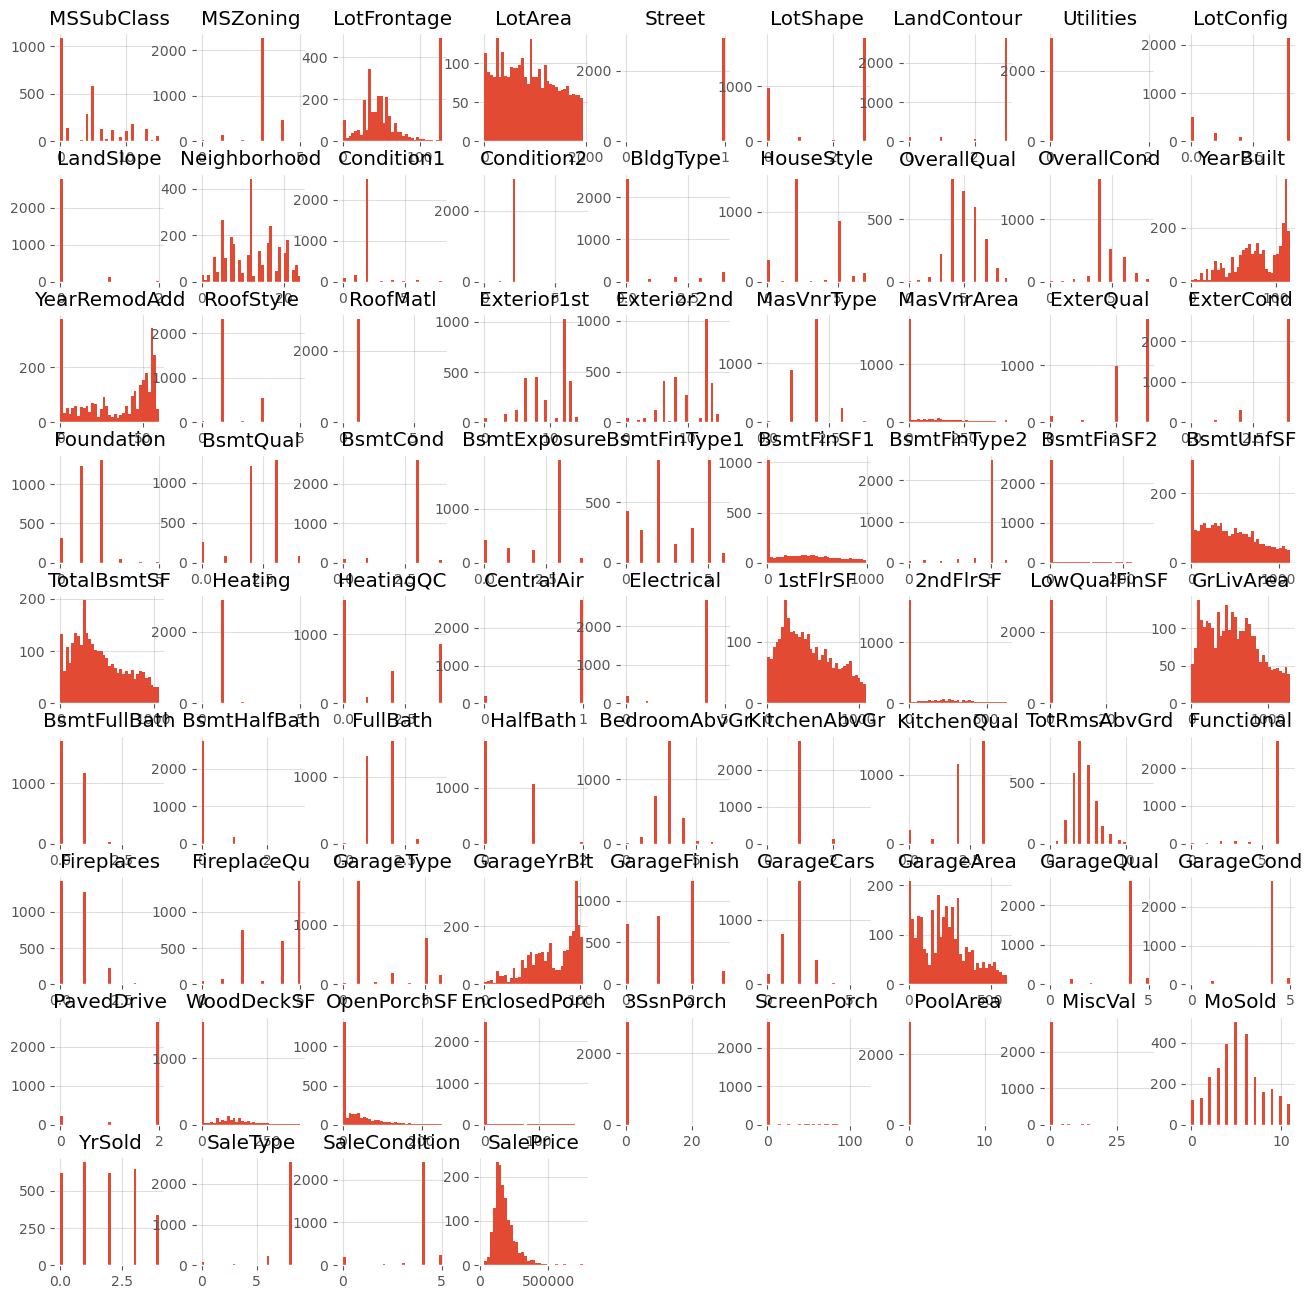

In [21]:
all_data1.hist(bins = 35,
          sharex = False,
          sharey = False,
          figsize = (16, 16)
         )
plt.show()

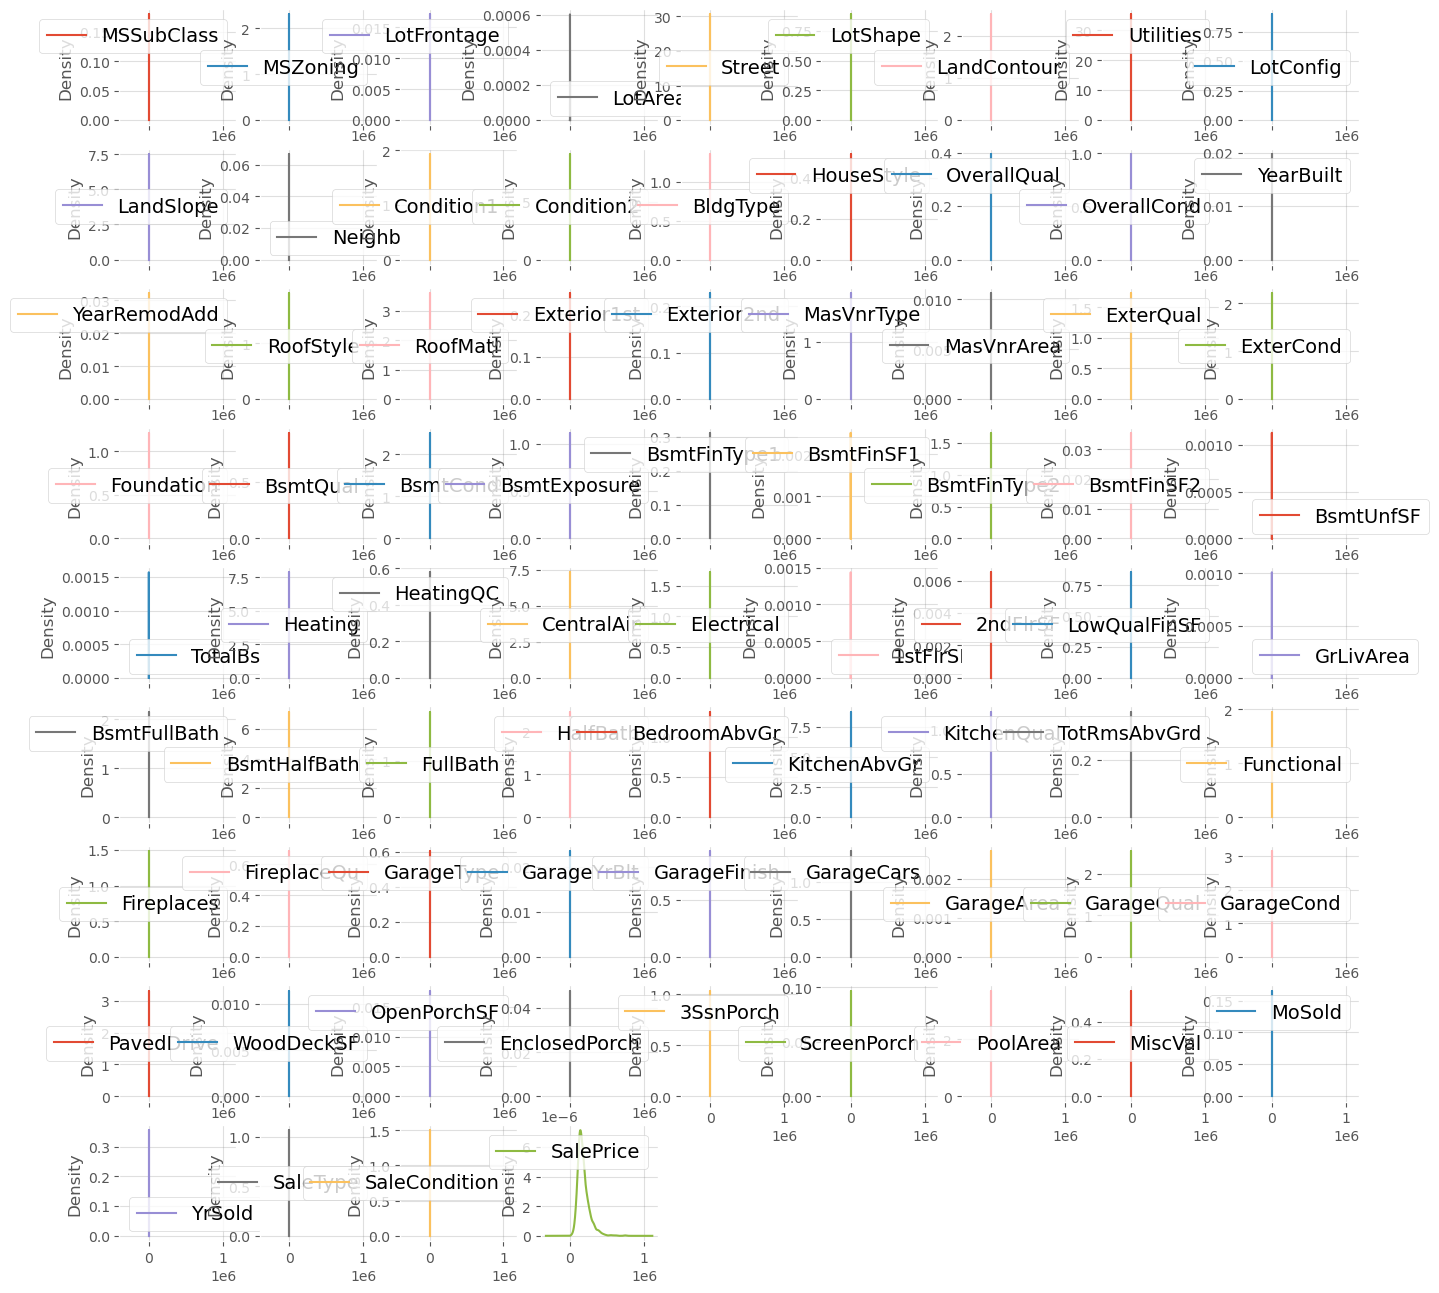

In [22]:
all_data1.plot(kind = "density",
          subplots = True,
          layout = (9,9),
          sharex = True,
          figsize = (16, 16)
         )
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

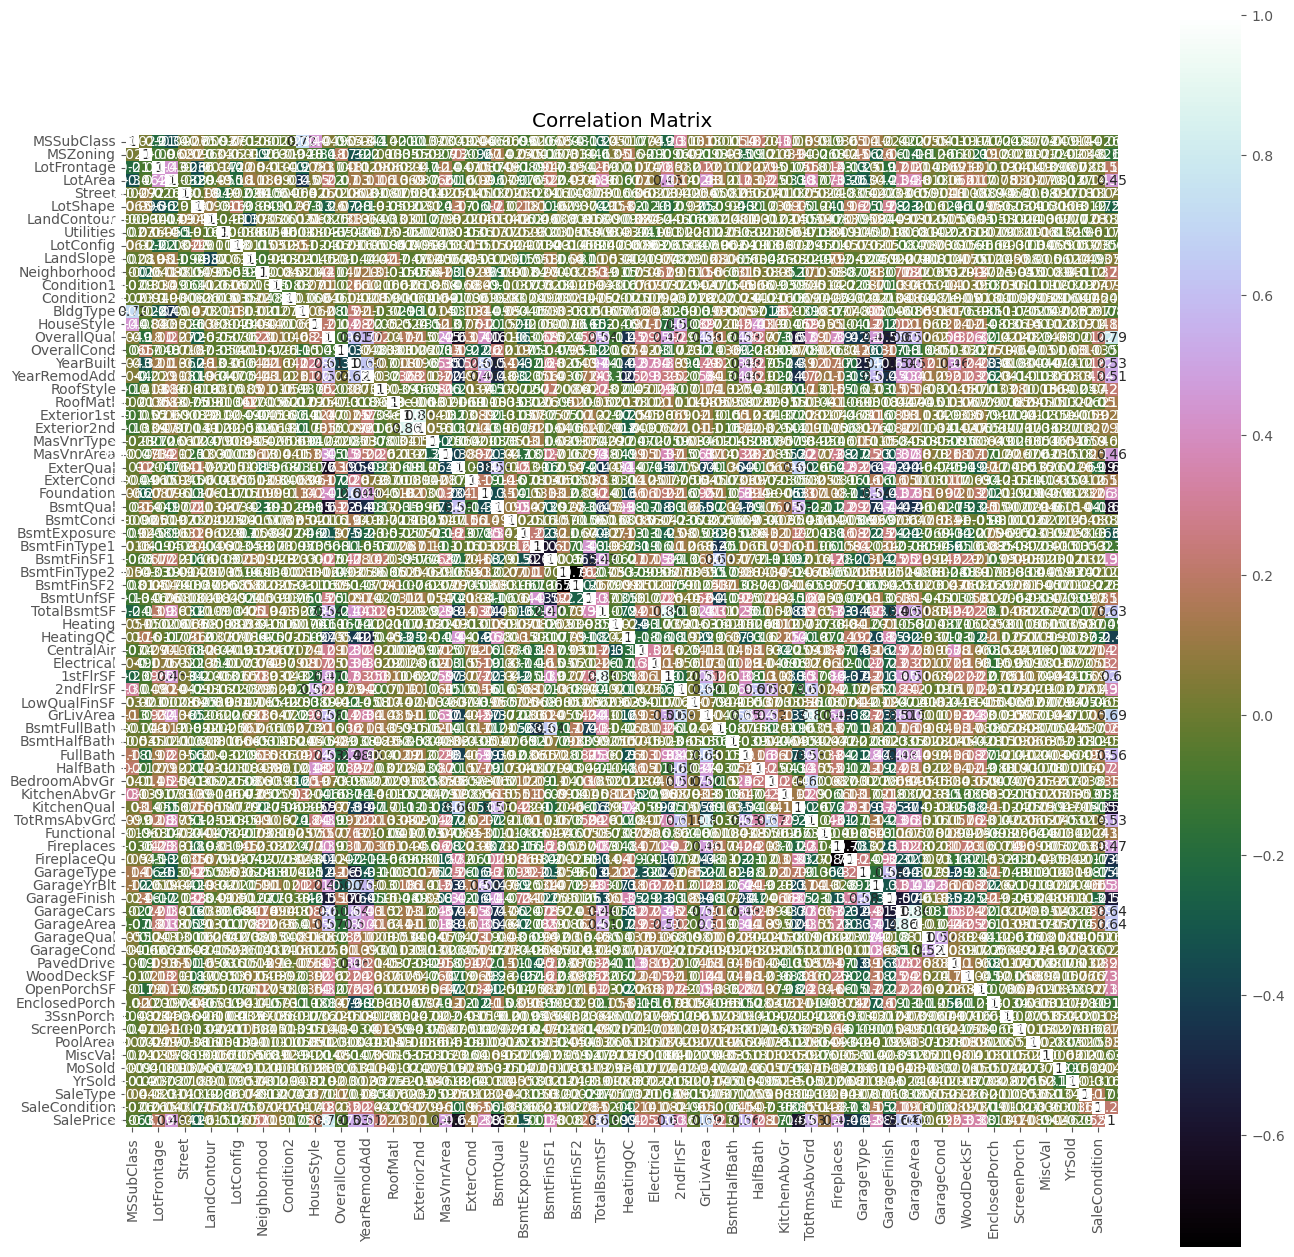

In [23]:
# sns.set_theme(style = "white")

correlation = all_data1.corr()

plt.figure(figsize = (16, 16)
          )

plt.title("Correlation Matrix")

sns.heatmap(correlation,
            vmax = 1,
            square = True,
            annot = True,
            cmap = "cubehelix")

### Lineear regression (example for myself)

In [24]:
all_data1.iloc[:1460,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,5,3,41,619,1,3,3,0,4,0,...,0,0,0,0,0,1,2,8,4,208500.0
2,0,3,56,895,1,3,3,0,2,0,...,0,0,0,0,0,4,1,8,4,181500.0
3,5,3,44,1266,1,0,3,0,4,0,...,0,0,0,0,0,8,2,8,4,223500.0
4,6,3,36,883,1,0,3,0,0,0,...,160,0,0,0,0,1,0,8,0,140000.0
5,5,3,60,1670,1,0,3,0,2,0,...,0,0,0,0,0,11,2,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,5,3,38,500,1,3,3,0,4,0,...,0,0,0,0,0,7,1,8,4,175000.0
1457,0,3,61,1569,1,3,3,0,4,0,...,0,0,0,0,0,1,4,8,4,210000.0
1458,6,3,42,759,1,3,3,0,4,0,...,0,0,0,0,29,4,4,8,4,266500.0


In [25]:
subset_dataset = all_data1.iloc[:1460,:]

Y= subset_dataset["SalePrice"]

X = subset_dataset.loc[:, all_data1.columns != "SalePrice"]

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=111)

In [29]:
model = LinearRegression()
# Train the model using the training sets
model.fit(X_train,y_train)
# Make predictions using the testing set
predictions = model.predict(X_test)
predictions

array([ 67064.797, 190520.162, 119510.763,  93088.597, 195313.171,
       339852.251,  81472.948, 121497.878, 118914.572, 143422.699,
       120697.791, 150114.387, 314623.182, 179816.305, 221268.793,
       140356.051, 120008.623, 125887.325,  78838.566, 229004.647,
       128861.865, 307481.541, 168022.633, 266473.156, 362706.017,
       167826.456, 139601.819, 101365.589, 101382.874, 189432.139,
        80766.324, 129467.643,  90240.327, 259704.206, 273173.915,
       322403.186, 113438.415, 277946.574, 160607.063, 235438.079,
        91284.163, 214517.507, 295967.331, 232290.63 , 234923.161,
       251639.366, 187728.026,  88899.816, 176972.743, 269221.315,
        71409.521,  75038.673, 111763.374, 277263.952, 138959.2  ,
       245342.653, 267587.677, 292733.283, 193774.303,  99329.183,
       354743.492, 105968.005, 167991.34 ,  57224.507, 112600.276,
       177088.719, 359452.05 ,  68672.055,  61372.65 , 242078.956,
       237048.566, 165282.042, 215512.606, 126790.796, 263958.

In [31]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  1335300768.7445858
mean_absolute_error :  20736.025705675685


In [33]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [34]:
parameters = {'fit_intercept': [True,False],
              'copy_X'    : [True,False],
              'n_jobs' : [-1,0,1,2,4,8],
              'positive'    : [True,False]
             }

In [36]:
grid_LR = GridSearchCV(estimator=LinearRegression(), param_grid = parameters, cv = 5, n_jobs=-1)
grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 0, 1, 2, 4, 8],
                         'positive': [True, False]})

# Model

## Train test split

In [37]:
all_data1.iloc[:1460,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,5,3,41,619,1,3,3,0,4,0,...,0,0,0,0,0,1,2,8,4,208500.0
2,0,3,56,895,1,3,3,0,2,0,...,0,0,0,0,0,4,1,8,4,181500.0
3,5,3,44,1266,1,0,3,0,4,0,...,0,0,0,0,0,8,2,8,4,223500.0
4,6,3,36,883,1,0,3,0,0,0,...,160,0,0,0,0,1,0,8,0,140000.0
5,5,3,60,1670,1,0,3,0,2,0,...,0,0,0,0,0,11,2,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,5,3,38,500,1,3,3,0,4,0,...,0,0,0,0,0,7,1,8,4,175000.0
1457,0,3,61,1569,1,3,3,0,4,0,...,0,0,0,0,0,1,4,8,4,210000.0
1458,6,3,42,759,1,3,3,0,4,0,...,0,0,0,0,29,4,4,8,4,266500.0


In [38]:
# split out validation dataset for the end
subset_dataset = all_data1.iloc[:1460,:]

Y= subset_dataset["SalePrice"]

X = subset_dataset.loc[:, all_data1.columns != "SalePrice"]

validation_size = 0.2

seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, 
                                                                Y, 
                                                                test_size = validation_size, 
                                                                random_state = seed)

#### Test Options and Evaluation Metrics

In [39]:
# test options for classification
num_folds = 5
seed=7
scoring = "neg_mean_squared_error"
#https://scikit-learn.org/stable/modules/model_evaluation.html for scoring parameters

In [40]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### Models

In [41]:
# Setting Dependencies

# the essentials

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# import

from pandas import read_csv, set_option

# EDA

from pandas.plotting import scatter_matrix
import seaborn as sns

# feature engineering

from sklearn.preprocessing import StandardScaler

# split, cross-validation, tuning, grid_search

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

# models (algos.)

# Predictive Model --> ML --> Supervised Learning --> Classification

# binary classification (up vs. down)
# multiclass 
# multiclass with order (ordinal outcome)
# multiclass without order (nominal outcome)

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # multi-class

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier

# Useful toolkit from sklearn

from sklearn.pipeline import Pipeline

# assessment of your models

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [42]:
# spot check the algorithms

models = []

models.append(("LR", LinearRegression()
              )
             )

models.append(("LASSO", Lasso()
              )
             )
    
models.append(("EN", ElasticNet()
              )
             )

models.append(("CART", DecisionTreeRegressor()
              )
             )

models.append(("KNN", KNeighborsRegressor()
              )
             )

models.append(("SVR", SVR()
              )
             )

models.append(("MLP", MLPRegressor(max_iter = 100000)
              )
             )


# Bagging

models.append(("ETR", ExtraTreesRegressor()
              )
             )

models.append(("RFR", RandomForestRegressor()
              )
             )

# Boosting

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

### K-folds cross validation

In [43]:
names = []

kfold_results = []

train_results = []
test_results = []

for name, model in models:
    names.append(name)
    
    # Let's run K-Fold analysis
    
    kfold = KFold(n_splits = num_folds,
                  random_state = seed,
                 shuffle = True)
    
    # for all scoring metrics, the higher the better
    
    cv_results = cross_val_score(model, X_train, Y_train,
                                      cv = kfold,
                                      scoring = scoring)
    
    kfold_results.append(cv_results) # REMEMBER TO ADD THIS
    
    # Entire training period
    
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Results for test
    
    test_result = mean_squared_error(res.predict(X_validation), Y_validation)
    test_results.append(test_result)
    
    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(message)

LR: -1140867086.593397 (320966673.607615) 892824224.753423 1044490122.766895
LASSO: -1140671562.168896 (320948054.406062) 892826035.145938 1044536831.142158
EN: -1109225318.979732 (236637381.780222) 980986577.675295 1158084250.079817
CART: -1923393079.718323 (704445512.114723) 0.000000 2005923659.821918
KNN: -1787497297.553400 (190737023.208653) 1133882071.072294 1814510749.568630
SVR: -6345001852.827708 (549617798.983990) 6344606868.165977 7709030353.803378
MLP: -1067915520.306993 (251905248.499277) 728078554.353201 1033653809.327444
ETR: -916617470.047561 (234822257.433402) 0.000000 790555050.599742
RFR: -992397867.480850 (192861069.356125) 142532058.577318 702243750.794849
GBR: -943892301.995550 (293882402.366450) 181049074.384595 649167206.194393
ABR: -1242957107.795924 (230800895.957369) 773965821.379049 1161963474.810583


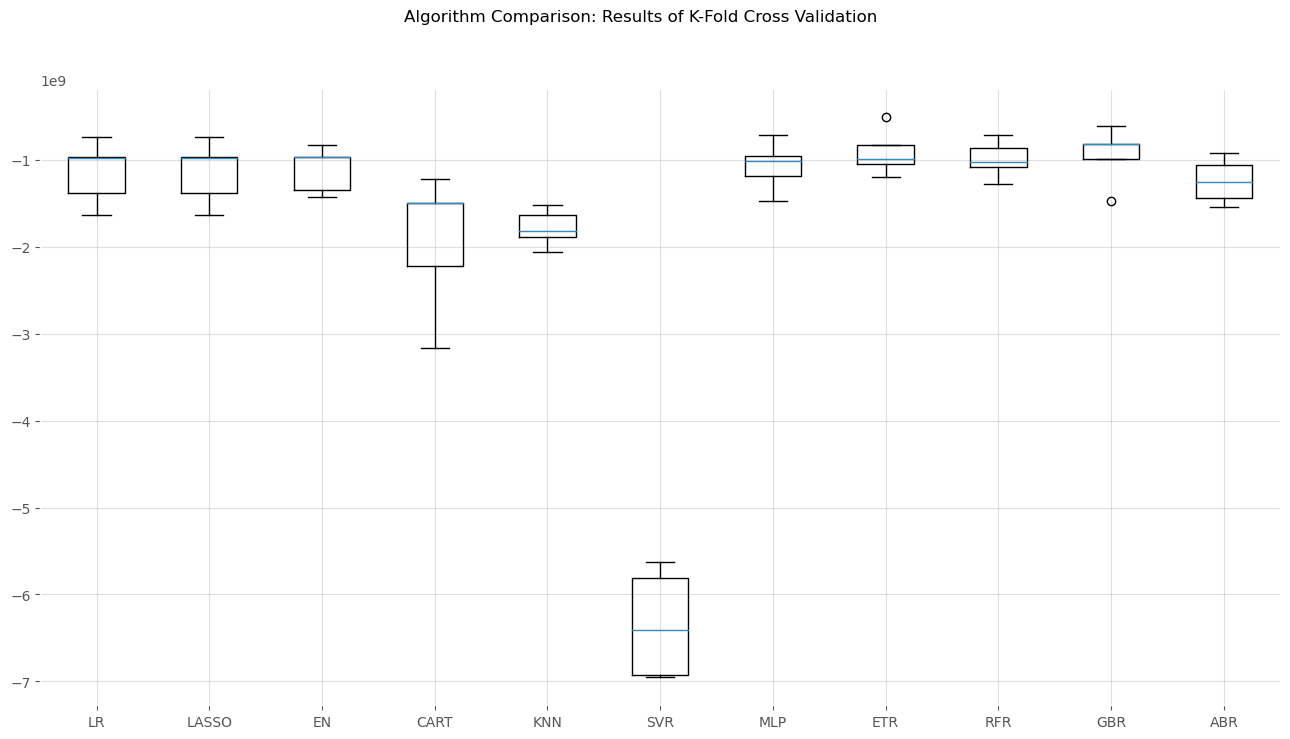

In [44]:
fig = plt.figure(figsize = (16, 8)
                 )

fig.suptitle("Algorithm Comparison: Results of K-Fold Cross Validation")

ax = fig.add_subplot(111)

plt.boxplot(kfold_results)

ax.set_xticklabels(names)

plt.show()



### Model Tuning and Grid Search

### gradient boosting is best model based on graph

In [45]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000, 1500],
              'max_depth'    : [4,6,8,10]
             }

In [ ]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, Y_train)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
GBR1 = GradientBoostingRegressor(learning_rate=0.04, max_depth=10, n_estimators=100,
                          subsample=0.1)
GBR1.fit(X_train, Y_train)

In [ ]:
ypred = GBR1.predict(X_validation)
mse = mean_squared_error(Y_validation,ypred)
 
print("MSE: %.2f" % mse)

In [ ]:
x_ax = range(len(Y_validation))
plt.scatter(x_ax, Y_validation, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(GBR1.predict(X_train))

In [ ]:
pd.DataFrame(GBR1.predict(X_validation))

In [ ]:
compare=pd.DataFrame(all_data1.iloc[1168:1460,].SalePrice)

In [ ]:
compare["prediction"]=GBR1.predict(X_validation)
compare["difference"]=1-(compare["prediction"])/compare["SalePrice"]
compare